In [4]:
import pandas as pd
data =pd.read_csv("clean_exchange_filled.csv")

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1826 non-null   object 
 1   ซื้อตั๋วเงิน  1826 non-null   float64
 2   ซื้อเงินโอน   1826 non-null   float64
 3   อัตราขาย      1826 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.2+ KB


In [6]:
data.describe()

,ซื้อตั๋วเงิน,ซื้อเงินโอน,อัตราขาย
count,1826.000000,1826.000000,1826.000000
mean,33.426934,33.520036,33.852213
std,2.084662,2.084548,2.080083
min,29.550100,29.642700,29.965300
25%,31.513200,31.607200,31.953050
50%,33.496317,33.590150,33.911467
75%,35.041250,35.138675,35.468000
max,38.078100,38.175500,38.500500


In [7]:
from matplotlib import pyplot as plt


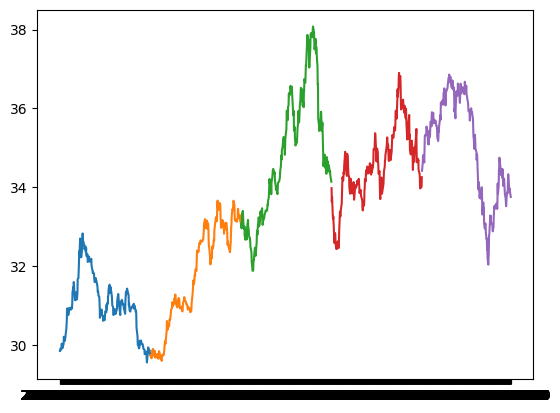

In [8]:
plt.plot(data.iloc[0:366]["Date"],data.iloc[0:366]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[366:733]["Date"],data.iloc[366:733]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[733:1099]["Date"],data.iloc[733:1099]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[1099:1465]["Date"],data.iloc[1099:1465]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[1466:]["Date"],data.iloc[1466:]["ซื้อตั๋วเงิน"])

plt.show()

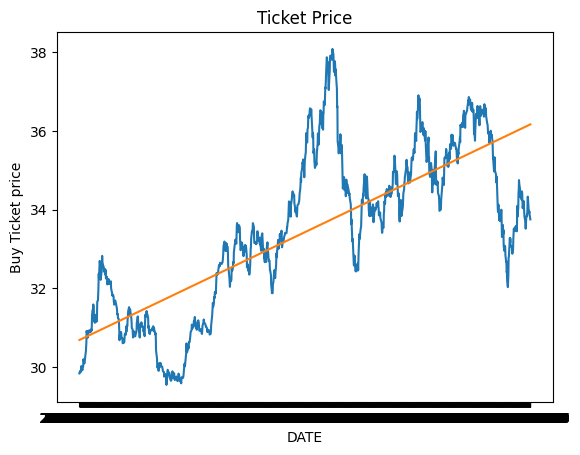

R^2 : 0.5751656754893181


In [23]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress( [x for x in range(0,len(data["ซื้อตั๋วเงิน"]))], data["ซื้อตั๋วเงิน"])
def linear(x):
    return slope*x + intercept
plt.plot(data["Date"],data["ซื้อตั๋วเงิน"])
mymodel = [ d for d in map(linear,[x for x in range(0,len(data["ซื้อตั๋วเงิน"]))] )]
plt.title("Ticket Price" )
plt.xlabel("DATE")
plt.ylabel("Buy Ticket price")
plt.plot(data["Date"],mymodel)
plt.show()
print("R^2 :",r**2)

In [20]:
def plot_linearto(start,end): 
    slope, intercept, r, p, std_err = stats.linregress( [x for x in range(0,len(data["ซื้อตั๋วเงิน"][start:end+1]))], data["ซื้อตั๋วเงิน"][start:end+1])
    def linear(x):
        return slope*x + intercept
    plt.plot(data["Date"][start:end+1],data["ซื้อตั๋วเงิน"][start:end+1])
    mymodel = [ d for d in map(linear,[x for x in range(0,len(data["ซื้อตั๋วเงิน"][start:end+1]))])]
    plt.title("Ticket Price" )
    plt.plot(data["Date"][start:end+1],mymodel,)
    plt.show()
    print("R^2 :",r**2)

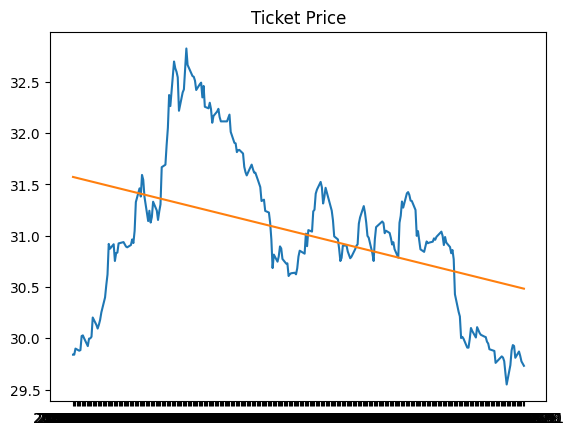

R^2 : 0.16987203190917405


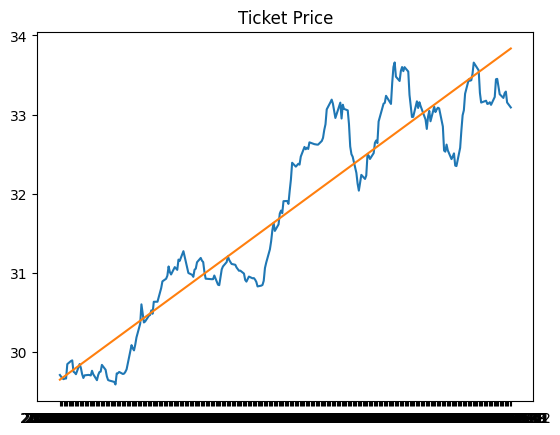

R^2 : 0.8874659926871848


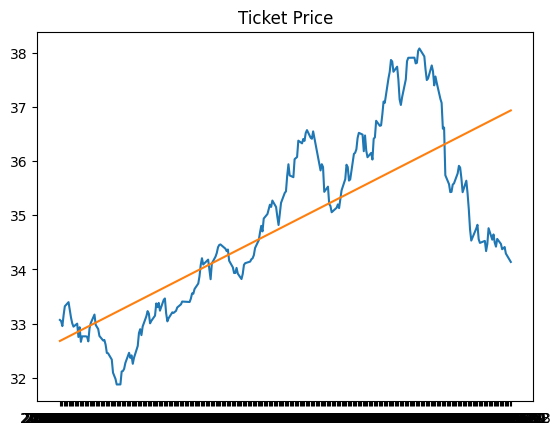

R^2 : 0.5658743132761573


In [21]:
plot_linearto(0,366)
plot_linearto(367,732)
plot_linearto(733,1098)